<a href="https://colab.research.google.com/github/vydiep/MLProject/blob/main/CNN_Segmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

# Import notebook
%run "/content/drive/MyDrive/Colab Notebooks/CNN_Utils.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch

In [3]:
class CNN(nn.Module):
  def __init__(self, dropout_prob = 0):
    super().__init__()

    
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.pool1 = nn.MaxPool2d(kernel_size = 1, stride = 2)

    self.conv2 = nn.Conv2d(32, 64, 3)
    self.pool2 = nn.MaxPool2d(kernel_size = 1, stride = 2)

    self.conv3 = nn.Conv2d(64, 96, 3)
    self.pool3 = nn.MaxPool2d(kernel_size = 1, stride = 2)

    self.conv4 = nn.Conv2d(96, 128, 3)
    self.pool4 = nn.MaxPool2d(kernel_size = 1, stride = 2)

    self.conv5 = nn.Conv2d(128, 160, 3)
    self.pool5 = nn.MaxPool2d(kernel_size = 1, stride = 2)

    self.conv6 = nn.Conv2d(160, 192, 3)
    self.pool6 = nn.MaxPool2d(kernel_size = 1, stride = 2)


    self.fc1 = nn.Linear(576, 288)
    self.fc2 = nn.Linear(288, 144)
    self.fc3 = nn.Linear(144, 1)


    self.dropout = nn.Dropout(p = dropout_prob)

    self.history = {"train_loss": [],
                    "train_acc": [],
                    "val_loss": [],
                    "val_acc": []}

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = self.pool3(F.relu(self.conv3(x)))
    x = self.pool4(F.relu(self.conv4(x)))
    x = self.pool5(F.relu(self.conv5(x)))
    x = self.pool6(F.relu(self.conv6(x)))

    x = torch.flatten(x, 1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.fc3(x)

    return x

In [4]:
data_3s = '/content/drive/Shareddrives/MLProject/MusicNet/spect_3s.json'

In [5]:
train_loader, test_loader, val_loader = get_loaders(data_3s)

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [8]:
model_r = CNN().to(device)

In [ ]:
train(model_r, train_loader, val_loader, 25, device)

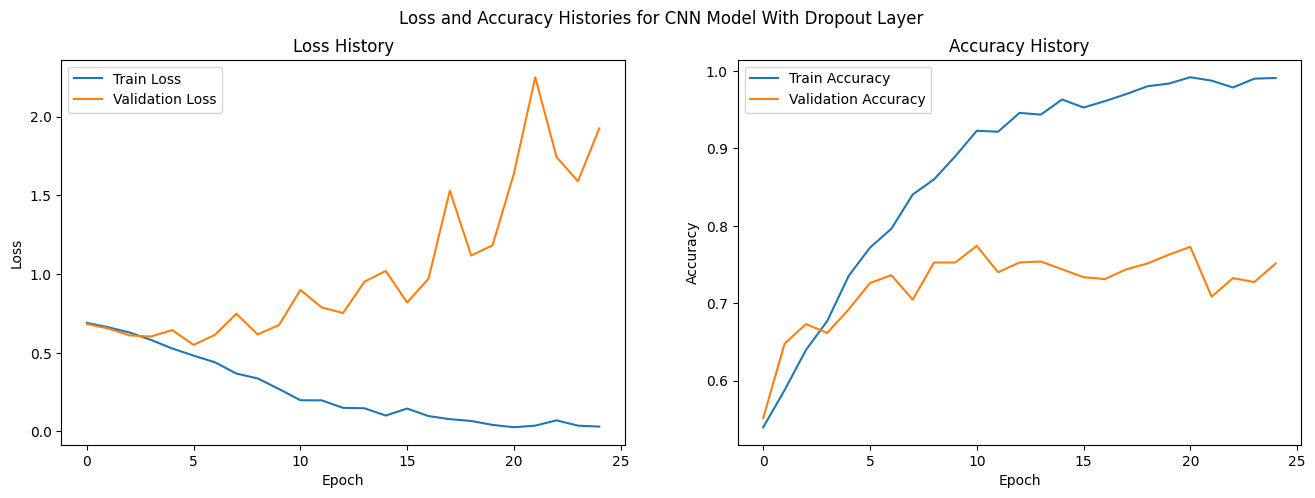

In [31]:
plot(model_r, '/content/drive/Shareddrives/MLProject/MusicNet/models/CNN-Reg.png')

In [27]:
model_do = CNN(dropout_prob = 0.2).to(device)

In [ ]:
train(model_do, train_loader, val_loader, 25, device)

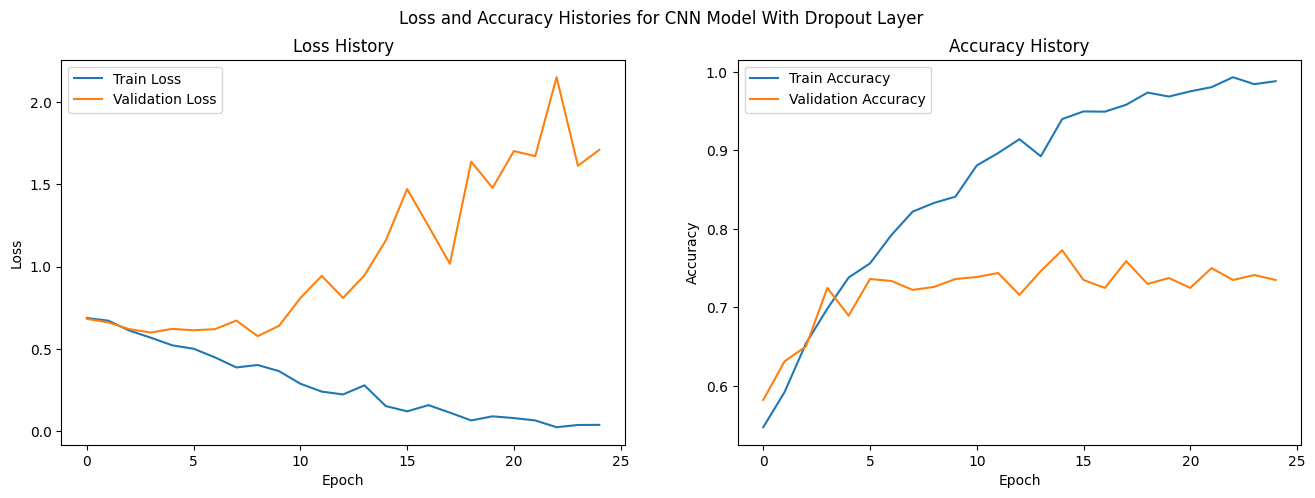

In [29]:
plot(model_do, '/content/drive/Shareddrives/MLProject/MusicNet/models/CNN_Drop.png')

In [12]:
test(model_r, test_loader, device)

Test accuracy: 74%


In [30]:
test(model_do, test_loader, device)

Test accuracy: 73%
